# Welcome to Lab: GPA 🎓

In this lab, you'll explore the GPA dataset again to find out more about the courses at Illinois!

Fun fact: the dataset you're using in this lab is the same dataset that Professor Wade uses to make the GPA visualizations! :)  Check this out here if you haven't seen it already: [https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/](https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/)


A few tips to remember:

- **You are not alone on your journey in learning programming!**  You have your lab TA, your CAs, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help!  When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same **<i>ah-hah</i>** moment!
- We are here to help you!  Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [ ]:
# Meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Peng"
ca1_name = "Sophia"
ca2_name = ""
ca3_name = ""


# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# Question of the Day (QOTD) to Ask Your Group: "What's your favorite social media?"
partner1_name = "jenny"
partner1_netid = "jarreci2"
partner1_favsocialmedia = "instagram"

partner2_name = "shivani"
partner2_netid = "sr80"
partner2_favsocialmedia = "tiktok"

partner3_name = "sofia"
partner3_netid = "sofia5"
partner3_favsocialmedia= "instagram"

partner4_name = "tori"
partner4_netid = "vrlee2"
partner4_favsocialmedia= "vsco"

<hr style="color: #DD3403;">

# Part 1: Exploring GPA

## Load the GPA Dataset

Before we begin exploring the GPA Dataset, we've got to load it in! The most recent version of the "GPA Dataset" (up to Spring 2023) is available here:
```
https://waf.cs.illinois.edu/discovery/gpa.csv
```

Use Python to load this dataset into a DataFrame called `df`:

In [4]:
import pandas as pd
import random

In [5]:
df = pd.read_csv("https://waf.cs.illinois.edu/discovery/gpa.csv")
df

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,11,5,...,0,0,0,0,0,0,1,0,22,"Shin, Jeongsu"
1,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,17,2,...,0,0,0,0,0,0,0,1,23,"Shin, Jeongsu"
2,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,13,2,...,0,0,1,0,0,0,1,0,21,"Lee, Sabrina Y"
3,2023,Spring,2023-sp,AAS,200,U.S. Race and Empire,LCD,6,15,5,...,0,0,0,0,1,0,1,0,33,"Sawada, Emilia"
4,2023,Spring,2023-sp,AAS,215,US Citizenship Comparatively,LCD,16,12,2,...,0,0,0,0,0,0,0,0,33,"Kwon, Soo Ah"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69064,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,0,1,3,0,0,0,2,1,31,"Stepanov, Alexei G"
69065,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0,0,0,0,0,0,0,0,28,"Unger, David"
69066,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,5,1,1,0,2,0,1,0,28,"Morgan, William T"
69067,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,3,3,2,0,0,1,1,0,21,"Ott-Monsivais, Stephanie"


### 🔬 Test Case Checkpoint 🔬

In [6]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert(len(df) == 69069), "This is not the GPA dataset you're looking for."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 1.1: The "Average GPA" Column
Each row in the GPA Dataset represents a **course section** at Illinois. For our exploratory data analysis, we are going to need an additional `Average GPA` column.

To create this column, we need to compute the **weighted average GPA** for each course section by taking into account the **number of students** who received each letter grade.

Add this new `Average GPA` column to our DataFrame `df` by finding the **products** of the **weight** associated with each **letter grade** and the number of said **letter grade** earned in each course section, **summing these products**, and then **dividing** by the **number of students** in the course section.

Remember:
- The **weight** of letter grades are as follows: $[A+ = 4.0, A = 4.0, A- = 3.67, \ldots  D- = 0.67, F = 0]$. <br> You can find a full scale at: https://registrar.illinois.edu/courses-grades/explanation-of-grades/
- The `Students` column of our DataFrame contains the number of students in a course section
- You've done this in your Mastery Platform homework before, now you're doing it for real :) 

In [16]:
df['Average GPA'] = (df["A+"] * (4.0) + df["A"] * (4.0) + df["A-"]*(3.67) + df["B+"] * (3.33) + df["B"] * (3.00) + df["B-"]*(2.67) + df["C+"] * (2.33) + df["C"] * (2.00) + df["C-"]*(1.67) + df["D+"] * (1.33) + df["D"] * (1.00) + df["D-"]*(0.67) + df["F"]*(0)) / df["Students"]
df

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Students,Primary Instructor,Average GPA
0,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,11,5,...,0,0,0,0,0,1,0,22,"Shin, Jeongsu",3.530909
1,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,17,2,...,0,0,0,0,0,0,1,23,"Shin, Jeongsu",3.797391
2,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,13,2,...,0,1,0,0,0,1,0,21,"Lee, Sabrina Y",3.476667
3,2023,Spring,2023-sp,AAS,200,U.S. Race and Empire,LCD,6,15,5,...,0,0,0,1,0,1,0,33,"Sawada, Emilia",3.606364
4,2023,Spring,2023-sp,AAS,215,US Citizenship Comparatively,LCD,16,12,2,...,0,0,0,0,0,0,0,33,"Kwon, Soo Ah",3.889091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69064,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,1,3,0,0,0,2,1,31,"Stepanov, Alexei G",3.183226
69065,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0,0,0,0,0,0,0,28,"Unger, David",3.774643
69066,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,1,1,0,2,0,1,0,28,"Morgan, William T",2.595714
69067,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,3,2,0,0,1,1,0,21,"Ott-Monsivais, Stephanie",2.603333


### 🔬 Test Case Checkpoint 🔬

In [17]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(df) == 69069  ), "You shouldn't be changing the length of `df` when computing Average GPA."
assert( "Average GPA" in df.columns), "Make sure your new column is named 'Average GPA'."
assert( math.isclose(df['Average GPA'].mean(), 3.3701121347989282)), "Your calculation of the Average GPA is incorrect."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 1.2: The "Hardest" and "Easiest" Courses?
One way to judge a course's difficulty is to consider its **Average GPA**. 

Using the `Average GPA` column and the two cells below, find:
- The **50** courses with the **lowest** `Average GPA`, storing in the DataFrame `df_hard`
- The **50** courses with the **highest** `Average GPA`, storing the DataFrame `df_easy` 

In [18]:
df_hard = df.nsmallest(50, "Average GPA")
df_hard

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Students,Primary Instructor,Average GPA
6215,2022,Spring,2022-sp,GS,199,College Academic Success,LCD,1,0,0,...,2,0,2,1,2,12,0,26,"Walk, Aaron J",1.140385
24225,2018,Fall,2018-fa,LER,120,Contemporary Labor Problems,ONL,0,0,1,...,1,2,1,1,0,15,0,28,"Taylor, Don",1.142857
8220,2021,Fall,2021-fa,CLCV,100,Vocab Building-GRK & LAT Roots,ONL,2,0,3,...,1,0,1,2,3,20,0,40,"Augoustakis, Antonios",1.208750
36697,2016,Spring,2016-sp,LER,100,Introduction to Labor Studies,ONL,0,1,0,...,4,1,1,1,1,10,0,24,"Hawking, Carol J",1.319583
44510,2014,Fall,2014-fa,LER,120,Contemporary Labor Problems,ONL,0,4,0,...,4,1,0,1,0,15,1,30,"Hershfield, David",1.400000
9322,2021,Fall,2021-fa,LER,100,Introduction to Labor Studies,ONL,0,1,0,...,3,0,2,0,1,11,0,26,"Ashby, Steven",1.410385
46778,2014,Spring,2014-sp,LER,120,Contemporary Labor Problems,ONL,0,1,3,...,3,0,0,0,2,11,0,25,"Cohen, Margaret L",1.427600
49575,2013,Fall,2013-fa,MATH,2,Introductory Algebra,LCD,0,0,0,...,10,5,3,3,2,5,3,31,"Aydin-Mullen, Yelda",1.430645
46853,2014,Spring,2014-sp,MATH,220,Calculus,LBD,0,3,0,...,5,0,2,1,0,11,1,28,"Gilbert, Rebekah A",1.476071
21497,2019,Spring,2019-sp,LER,100,Introduction to Labor Studies,ONL,0,2,1,...,0,0,0,2,1,9,0,21,"Cohen, Margaret L",1.491905


In [19]:
df_easy = df.nlargest(50, "Average GPA")
df_easy

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Students,Primary Instructor,Average GPA
22401,2019,Summer,2019-su,IS,532,Theory & Pract Data Cleaning,ONL,266,18,1,...,0,0,0,0,0,0,0,286,"Ludaescher, Bertram",3.995350
12466,2021,Summer,2021-su,IS,537,Theory & Prct of Data Cleaning,ONL,407,9,0,...,0,0,0,0,0,0,0,419,NaN,3.995203
4472,2022,Fall,2022-fa,MUSC,487,Marching Illini,PR,0,289,0,...,0,0,0,0,0,0,1,291,"Houser, Barry L",3.993127
35355,2016,Spring,2016-sp,ACCY,398,Practical Problems in Atg,ONL,139,1,0,...,0,0,0,0,0,0,0,141,"Nekrasz, Frank",3.992908
31268,2017,Spring,2017-sp,EPSY,490,Prep for Recruitment Counselor,NaN,69,14,0,...,0,0,0,0,0,0,0,84,"Brown, Dawn M",3.992024
44790,2014,Fall,2014-fa,ME,199,Automotive Design Projects,LBD,8,111,0,...,0,0,0,0,0,0,0,120,"Philpott, Michael L",3.991667
32858,2016,Fall,2016-fa,ANSC,103,Working With Farm Animals,NaN,0,79,0,...,0,0,0,0,0,0,0,80,"Cobb, Alan R",3.991625
37829,2015,Fall,2015-fa,ANSC,103,Working With Farm Animals,LEC,0,76,0,...,0,0,0,0,0,0,0,77,"Cobb, Alan R",3.991299
7279,2022,Spring,2022-sp,VCM,673,Companion Animal Rehab,LCD,69,2,0,...,0,0,0,0,0,0,0,72,"Knap, Kimberly E",3.990694
54859,2012,Fall,2012-fa,MUS,273,Marching Illini,PR,0,308,0,...,0,0,0,0,0,0,0,311,"Houser, Barry L",3.990354


Now, using your two new DataFrames (`df_hard` and `df_easy`), find:
- The **mean course number** of the 50 hardest courses by GPA, storing in the variable `hard_avg`
- The **mean course number** of the 50 easiest courses by GPA, storing in the variable `easy_avg`

The **course number** of a course is stored in the **'Number'** column of our DataFrames. 

In [24]:
hard_avg = df_hard["Number"].mean()
hard_avg

166.42

In [25]:
easy_avg = df_easy["Number"].mean()
easy_avg

375.56

### 🔬 Test Case Checkpoint 🔬

In [26]:
## == TEST CASE for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell(s), make changes, and RE-RUN your code and then this cell.
import math
assert( len(df_hard) == len(df_easy) == 50 ), "Your df_hard and df_easy should be picking the 50 courses with the lowest / highest average GPA respectively. Please double check that you are selecting 50 courses."
assert( math.isclose(df_hard['Average GPA'].sum(), 80.30481775738464) ), "Your df_hard is calculated incorrectly. Make sure you are finding the 50 courses with the lowest Average GPA."
assert( math.isclose(df_easy['Average GPA'].sum(), 199.38547959954138) ), "Your df_easy is calculated incorrectly. Make sure you are finding the 50 courses with the highest Average GPA."
assert( math.isclose(hard_avg, 166.42) ), "Your calculation for the average course number of 'hard' courses is incorrect. Make sure you are finding the mean of course numbers of df_hard."
assert( math.isclose(easy_avg, 372.74) or math.isclose(easy_avg, 375.56)), "Your calculation for the average course number of 'easy' courses is incorrect. Make sure you are finding the mean of course numbers of df_easy."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Analysis: "Hardest" and "Easiest" Courses? 

**Q1: After solving Puzzle 1.2, your friend has the following claim:**

> *"We know that the undergraduate courses are coded from 001 to 499, where a larger number (in the hundreds place) usually implies more advanced material.  Based on our results in the previous puzzles, the data shows that the junior-level and senior-level courses are clearly not the hardest courses at UIUC."*

**Comment on your friend's claim below. Do you think they are correct? Explain why or why not in at least three complete sentences.**

I think they are incorrect. There are a number of factors that can play into why the GPAs in high level courses are higher. For example, the number of enrollment in each class can affect the overall GPA. The overall gpa for a high level class with 10 students who are averaging A+ will be different compared to a 100 level course with 300+ students averaging different letter grades. 

<hr style="color: #DD3403;">

# Part 2: GPA By Subject
We've explored some of the GPA Dataset as a whole, but what if we want to investigate **differences in GPA by subject**? 

### Puzzle 2.1: Grouping by Subject
To look into the different Average GPAs for each Subject, we need to **group** our DataFrame. 

In the following cell, create a new DataFrame, `df_subject`, which will contain this grouped GPA data. Using `df.groupby()`, **group** our original DataFrame (`df`) by `Subject` so each **letter grade column** contains the **total number of students** receiving the same grade in that `Subject`. 

**NUMERIC ONLY**: For the agg function in the lab, we want to aggregate only the numeric columns:
- To do this, when you use `.agg("...")`, include the option `numeric_only=True`.
- For example, to aggregate by `sum`, you would use: `.agg("sum", numeric_only=True)`.
- Instead, to aggregate by `count`, you would use: `.agg("count", numeric_only=True)`.

**DO I USE `count` or `sum`?**:
- Each row in `df` represents a **course section** of a `Subject` with the **number of students** receiving grades for that course.
- Do you want to "count" the number of rows, or "sum" the number of students receiving each grade?
- And, don't forget to `.reset_index()`. :)

In [27]:
df_subject = df.groupby("Subject").agg("sum", numeric_only = True).reset_index()
df_subject

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
0,AAS,487957,30830,1046,2848,1034,650,656,300,167,174,70,38,44,23,121,27,7171,850.634524
1,ABE,334687,55670,554,3294,912,828,1027,269,151,204,51,19,52,8,74,21,7443,582.572077
2,ACCY,5724312,1071001,14063,35903,21755,19601,18486,7665,3883,3135,1547,442,866,286,889,353,128521,9662.346404
3,ACE,2278417,317378,7881,19032,6734,5527,9076,3334,2155,3125,1025,483,884,288,979,148,60523,3735.976531
4,ACES,372980,21429,1415,2166,358,175,323,87,91,99,40,23,36,18,93,10,4924,679.355496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,UP,729848,129060,1480,4861,2491,1455,1552,594,315,346,164,49,101,68,232,43,13708,1269.489026
168,VB,8040,2489,0,212,6,6,120,1,0,40,0,0,2,0,0,0,387,13.974534
169,VCM,100737,31625,497,1594,35,55,1077,20,19,350,1,1,42,0,4,0,3695,177.305433
170,VM,252090,76368,0,2760,8,0,7765,1,0,4587,0,0,515,0,18,10,15654,354.664640


### 🔬 Test Case Checkpoint 🔬

In [28]:
## == TEST CASE for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell(s), make changes, and RE-RUN your code and then this cell.
import math
assert( 'df_subject' in vars() ), "Make sure your DataFrame grouped by 'Subject' is named 'df_subject'." 
assert( len(df_subject) == 172 ), "Make sure you are grouping by 'Subject'. There are 172 Subjects in our original `df`, so the length of `df_subject` should be 172."
assert( math.isclose(df_subject.Students.mean(), 23723.837209302324) ), "Double-check that you are aggregating your df_subject correctly."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 2.2: Fixing our `Average GPA` Column
Your intuition may tell you that some columns in `df_subject` look off. This is correct - given the way we've grouped the data to find **total student counts** by grade, the `Year` and `Average GPA` columns are incorrect. 

Let's fix this by redefining the `Average GPA` column in our `df_subject`.

The `Average GPA` column should contain the **weighted average GPA** of each `Subject` by taking into account the **number of students** who received each letter grade in said `Subject`. 

Remember:
- The **weight** of letter grades are as follows: $[A+ = 4.0, A = 4.0, A- = 3.67, \ldots  D- = 0.67, F = 0]$. <br> You can find a full scale at: https://registrar.illinois.edu/courses-grades/explanation-of-grades/
- The `Students` column of our DataFrame contains the number of students in a `Subject`
- This Puzzle is **strikingly similar** to **Puzzle 1.1** in this lab - just make sure you use `df_subject` this time! 

In [30]:
df_subject['Average GPA'] = (df_subject["A+"] * (4.0) + df_subject["A"] * (4.0) + df_subject["A-"]*(3.67) + df_subject["B+"] * (3.33) + df_subject["B"] * (3.00) + df_subject["B-"]*(2.67) + df_subject["C+"] * (2.33) + df_subject["C"] * (2.00) + df_subject["C-"]*(1.67) + df_subject["D+"] * (1.33) + df_subject["D"] * (1.00) + df_subject["D-"]*(0.67) + df_subject["F"]*(0) + df_subject["W"]*(0))/df_subject["Students"]
df_subject

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
0,AAS,487957,30830,1046,2848,1034,650,656,300,167,174,70,38,44,23,121,27,7171,3.523670
1,ABE,334687,55670,554,3294,912,828,1027,269,151,204,51,19,52,8,74,21,7443,3.523195
2,ACCY,5724312,1071001,14063,35903,21755,19601,18486,7665,3883,3135,1547,442,866,286,889,353,128521,3.427036
3,ACE,2278417,317378,7881,19032,6734,5527,9076,3334,2155,3125,1025,483,884,288,979,148,60523,3.331010
4,ACES,372980,21429,1415,2166,358,175,323,87,91,99,40,23,36,18,93,10,4924,3.650971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,UP,729848,129060,1480,4861,2491,1455,1552,594,315,346,164,49,101,68,232,43,13708,3.465470
168,VB,8040,2489,0,212,6,6,120,1,0,40,0,0,2,0,0,0,387,3.448760
169,VCM,100737,31625,497,1594,35,55,1077,20,19,350,1,1,42,0,4,0,3695,3.450411
170,VM,252090,76368,0,2760,8,0,7765,1,0,4587,0,0,515,0,18,10,15654,2.814362


### 🔬 Test Case Checkpoint 🔬

In [31]:
## == TEST CASES for Puzzle 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(df_subject) == 172 ), "You shouldn't be changing the length of `df_subject` when recomputing Average GPA."
assert( "Average GPA" in df_subject.columns), "Make sure your column is still named 'Average GPA'."
assert( math.isclose(df_subject['Average GPA'].mean(), 3.4643567698520825) ), "Your calculation of the Average GPA by Subject is incorrect."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 2.3: The "Hardest" and "Easiest" Subjects?
One way we can judge a Subject's difficulty is to consider its **Average GPA**. 

Using your `df_subject`'s  `Average GPA` column and the two cells below, find:
- The **10** Subjects with the **lowest** `Average GPA`, storing in the DataFrame `hard_subjects`
- The **10** Subjects with the **highest** `Average GPA`, storing the DataFrame `easy_subjects` 

In [32]:
hard_subjects = df_subject.nsmallest(10, "Average GPA")
hard_subjects

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
170,VM,252090,76368,0,2760,8,0,7765,1,0,4587,0,0,515,0,18,10,15654,2.814362
161,TAM,755986,117633,2675,6095,4562,4380,5209,3453,2685,2826,1679,1005,1222,575,1382,182,37748,2.885195
115,MATH,5458565,841034,16620,41016,24270,24073,31049,18525,15652,18362,9643,5397,6770,2807,8879,1737,223063,2.902823
108,LAT,12076,613,14,20,17,16,21,7,14,6,3,1,3,2,8,0,132,2.944394
147,SAME,6039,437,2,29,30,20,31,12,14,17,5,2,2,3,5,1,172,2.949884
132,PHYS,2076631,298142,18520,20376,13790,12848,13362,11875,9692,9494,7169,4442,3233,3718,2073,821,130592,2.955341
40,CHBE,677626,140624,988,4587,2475,2380,4106,1935,1503,2491,872,183,412,75,314,85,22321,3.021324
41,CHEM,3924326,379984,19423,55822,23212,22490,29038,16969,15408,17937,9987,4886,5084,2748,5187,1425,228191,3.047261
117,MCB,4814562,608507,10011,17923,14552,13672,15423,9344,6821,6245,3577,2085,1644,947,1475,449,103719,3.097746
131,PHIL,1196896,102848,1046,4652,3726,3057,2962,1823,983,850,481,210,290,213,943,129,21236,3.103471


In [33]:
easy_subjects = df_subject.nlargest(10, "Average GPA")
easy_subjects

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
124,MUSC,64702,15116,243,1606,43,19,38,5,1,10,2,0,3,0,13,2,1983,3.919869
68,ERAM,16178,4498,57,133,33,8,8,1,0,0,0,0,1,0,0,0,241,3.881411
38,CB,4022,1250,0,140,0,0,17,0,0,1,0,0,0,0,0,2,158,3.879747
37,BUS,845103,58504,1322,9705,1544,671,401,124,55,55,14,16,20,10,42,15,13979,3.852386
166,UKR,10070,565,10,206,46,21,9,4,0,1,0,0,0,1,0,2,298,3.835906
44,CHP,44439,4575,210,299,52,17,24,4,2,6,1,1,0,0,6,1,622,3.835675
139,REES,6047,603,32,34,7,2,5,2,0,0,0,0,1,0,0,0,83,3.827590
13,ALEC,18196,3245,102,124,23,8,8,1,2,1,2,2,0,0,3,0,276,3.820217
64,EOL,120952,32561,94,1376,267,130,104,12,4,9,0,0,6,0,10,3,2012,3.812202
137,PSM,20167,5015,140,54,16,4,14,4,2,3,2,0,0,0,1,0,240,3.811333


### 🔬 Test Case Checkpoint 🔬

In [34]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(hard_subjects) == len(easy_subjects) == 10 ), "Make sure you are selecting the ten hardest or easiest subjects by GPA. This means your hard_subjects and easy_subjects DataFrames should both have exactly ten rows."
assert( math.isclose(hard_subjects['Average GPA'].sum(), 29.72180057281505) ), "Your calculation for the hardest subjects by GPA is incorrect. Remember, here harder = lower Average GPA."
assert( math.isclose(easy_subjects['Average GPA'].sum(), 38.47633638756495) ), "Your calculation for the easiest subjects by GPA is incorrect. Remember, here easier = higher Average GPA."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Analysis: "Hardest" and "Easiest" Subjects? 

**Q2: Observe the `Subject` column of the `hard_subjects` and `easy_subjects` you've found in Puzzle 2.3 above. Do you think these are truly the "Hardest" and "Easiest" subjects at Illinois? Explain why or why not.** 


*Note: You can use http://catalog.illinois.edu/courses-of-instruction/ to find what the different `Subject` codes mean.*


The subjects in the hardest dataframe are the STEM majors meanwhile the subjects in the easy DF are humanities. It can be said that STEM majors tend to be more complex and difficult as there is a lot of classes that are challenging. But, I think that any major can be hard. Humanities majors tend to be more philosophical and thought provoking which is challenging. I know for me, I find English and Global Studies extremely hard while I think that Math is easy. It all depends on what someone deems as 'hard' and 'easy'. 

### Puzzle 2.4: Visualizing GPA by Subject
We've got the **Average GPA** of each `Subject` at Illinois, but what if we want to look at the **bigger picture** across all subjects? Well, data visualization comes to the rescue!

Generate a **histogram** of the **Average GPA** in your `df_subject`:

<Axes: ylabel='Frequency'>

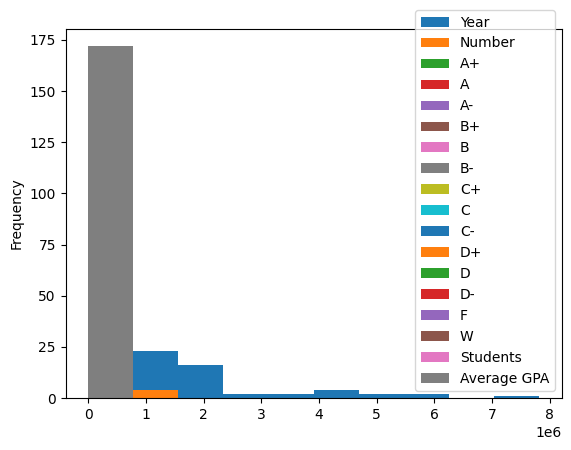

In [35]:
df_subject.plot.hist()

### Analysis: Histogram Interpretations

**Q3: Based on the histogram you generated above, what do you think the Average GPA across all courses in a typical Subject at Illinois is? No need for an exact answer, just estimate.** 


Based on the histogram, I think the average GPA is in between a C- and B- (1.67-2.67)

### Puzzle 2.5: Your Major! 
We've done a lot of analysis on every course and every subject, but Data Science should also be personal to you!

Using your `df_subject`, isolate the row containing the `Subject` of **your Major**, storing in the variable `my_subject`:

(If you're undecided, you can pick any `Subject`!)

In [37]:
my_subject = df_subject[df_subject["Subject"] == "ASRM"]
my_subject

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
25,ASRM,125259,23280,585,794,416,313,309,196,122,81,44,30,35,21,47,9,2993,3.389255


### Analysis: Your Major's Average GPA

**Q4: Observe the `Average GPA` column of your subject from Puzzle 2.5 above. Is it higher or lower than you expected?** 


I think it is what I expected it to be. I know my GPA is around that range and several of my friends in my major are also within 3.38. 

<hr style="color: #DD3403;">

# Part 3: GPA By Year
At this point, we've investigated the GPA Dataset as a whole and grouped by `Subject`. While our GPA Dataset contains **a lot** of course data, some of the listed courses are quite old: **dating back to 2010**! To put that into perspective, a senior in college now would be no more than **10 years old** in 2010. 

One can question the changes to GPA **over time**. Some questions may include:
- Has GPA gone up, because classes became "easier"? 
- Has the GPA fallen because of stricter grading policies? 
- How was GPA impacted in 2019-2020 at the brunt of COVID? 

You will gain some insight into the answers to questions in this section of the lab. 

### Puzzle 3.1: Grouping by Year
To look into how the GPA changes by `Year`, we need to again **group** our DataFrame. 

In the following cell, create a new DataFrame, `df_year`, which will contain this grouped GPA data. Using `df.groupby()`, **group** our original DataFrame (`df`) by `Year` so each **letter grade column** contains the **total number of students** receiving said grade in that `Year`. 

Remember: You did something quite similar in Puzzle 2.1 to create `df_subject`. This might help you decide what type of **aggregation** (`.agg()`) to use when **grouping**.
- In this puzzle, you should also use `numeric_only=True` in your `agg` function, just like in Puzzle 2.1.
- And, don't forget to `.reset_index()`! :)

In [42]:
df_year = df.groupby("Year").agg("sum", numeric_only = True).reset_index()
df_year

,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
0,2010,1493480,19355,77012,36814,30579,43517,17195,11604,15753,5812,2975,4438,1506,4511,1404,271071,17983.181282
1,2011,2180531,30104,116873,56123,47410,64714,25734,17362,23971,9576,4429,6884,2517,7389,1833,413086,26391.118984
2,2012,822949,11834,44738,20603,17041,22408,9485,6515,8221,3307,1690,2218,936,2681,626,151677,9532.509354
3,2013,1468576,22541,81114,37513,30624,40241,17471,11611,14875,6367,3103,4263,1851,4895,1072,276469,16764.437980
4,2014,1442419,25404,79518,36863,30783,38716,17733,11728,14813,6584,3258,4644,2073,5380,1293,277497,16395.289276
5,2015,1518025,29005,87375,39421,31956,40279,18204,12288,14909,6583,3562,4537,2057,5572,1327,295748,17399.314543
6,2016,1453915,29090,85566,37979,30316,37737,16756,11627,14213,6120,3325,4273,1964,5800,1254,284766,16612.060181
7,2017,1513870,34894,92185,38313,29892,37507,16522,11096,14282,6128,3252,4600,2013,6161,1295,296845,17131.289555
8,2018,1509394,40121,98620,39606,29496,35840,16097,10811,13404,5949,3335,4353,2042,6251,1121,305925,17000.203298
9,2019,1528969,41642,104139,40875,30890,37332,16680,11203,13623,6117,3283,4434,2212,6914,1146,319344,16983.843455


### 🔬 Test Case Checkpoint 🔬

In [43]:
## == TEST CASE for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( 'df_year' in vars() ), "Make sure your DataFrame grouped by Year is named 'df_year'." 
assert( len(df_year) == 14 ), "Make sure you are grouping by 'Year'. There are 14 years in our original `df`, so the length of `df_years` should be 14."
assert( math.isclose(df_year.Students.mean(), 291464.28571428574) ), "Double-check that you are aggregating your df_year correctly."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 3.2: Fixing our `Average GPA` Column Again
Some columns in `df_year` are incorrectly calculated given the way we've grouped the data.

Let's fix this by redefining the `Average GPA` column in our `df_year`.

The `Average GPA` column should contain the **weighted average GPA** of each `Year` by taking into account the **number of students** who received each letter grade in said `Year`. 

Remember: You've done this twice before in **Puzzle 1.1** and **Puzzle 2.2** - just make sure you use `df_year` this time! 

In [45]:
df_year["Average GPA"] = (df_year["A+"] * (4.0) + df_year["A"] * (4.0) + df_year["A-"]*(3.67) + df_year["B+"] * (3.33) + df_year["B"] * (3.00) + df_year["B-"]*(2.67) + df_year["C+"] * (2.33) + df_year["C"] * (2.00) + df_year["C-"]*(1.67) + df_year["D+"] * (1.33) + df_year["D"] * (1.00) + df_year["D-"]*(0.67) + df_year["F"]*(0) + df_year["W"]*(0))/df_year["Students"]
df_year


,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
0,2010,1493480,19355,77012,36814,30579,43517,17195,11604,15753,5812,2975,4438,1506,4511,1404,271071,3.233537
1,2011,2180531,30104,116873,56123,47410,64714,25734,17362,23971,9576,4429,6884,2517,7389,1833,413086,3.228032
2,2012,822949,11834,44738,20603,17041,22408,9485,6515,8221,3307,1690,2218,936,2681,626,151677,3.253189
3,2013,1468576,22541,81114,37513,30624,40241,17471,11611,14875,6367,3103,4263,1851,4895,1072,276469,3.250664
4,2014,1442419,25404,79518,36863,30783,38716,17733,11728,14813,6584,3258,4644,2073,5380,1293,277497,3.240724
5,2015,1518025,29005,87375,39421,31956,40279,18204,12288,14909,6583,3562,4537,2057,5572,1327,295748,3.266786
6,2016,1453915,29090,85566,37979,30316,37737,16756,11627,14213,6120,3325,4273,1964,5800,1254,284766,3.275170
7,2017,1513870,34894,92185,38313,29892,37507,16522,11096,14282,6128,3252,4600,2013,6161,1295,296845,3.301471
8,2018,1509394,40121,98620,39606,29496,35840,16097,10811,13404,5949,3335,4353,2042,6251,1121,305925,3.337837
9,2019,1528969,41642,104139,40875,30890,37332,16680,11203,13623,6117,3283,4434,2212,6914,1146,319344,3.339275


### 🔬 Test Case Checkpoint 🔬

In [46]:
## == TEST CASE for Puzzle 3.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(df_year) == 14 ), "You shouldn't be changing the length of `df_year` when recomputing Average GPA."
assert( "Average GPA" in df_year.columns), "Make sure your column is still named 'Average GPA'."
assert( math.isclose(df_year['Average GPA'].mean(), 3.3272744718333738) ), "Your calculation of the Average GPA by Year is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 3.3: Visualizing GPA over Time
We now have the data of the `Average GPA` across the University over time in years. Using this data, we can generate yet another visualization built-in to Pandas to visualize this data: a **line plot**! 

You can plot a **connected line** that draws your **numeric data** from a DataFrame, `df`, using the syntax:

&emsp;`df.plot.line(x='column1', y='column2')`

This line of code plots the line and specifies the **column names** to be used for the **x-values** and **y-values** of the points on your line plot.


In the cell below, using similar syntax, plot the **average GPA over time** using `df_year`. 

*Hint: the `Year` column should provide **x-values** and the `Average GPA` column should provide **y-values**.*

<Axes: xlabel='Year'>

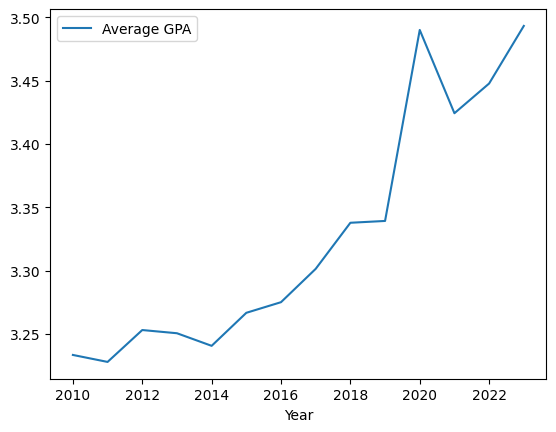

In [47]:
df_year.plot.line(x = "Year", y= "Average GPA")

***Side Note***: If you're using **Visual Studio Code** on **dark mode**, you may not be able to see the **axes** and **axes labels** of the graph. 

**Only if** this is the case, please **copy and run** the following **two lines** of code in a cell:

---
```py
from matplotlib import style
style.use('dark_background')
```
---

And then **re-run your plotting code** above. 

### Analysis: Plotted GPA over Time

**Q5: Note a few observations you have about the changes to `Average GPA` at Illinois over time. Is there an overall trend? What events could have spiked increases to the Average GPA? Respond with at least three sentences.** 


We can see that the overall trend is upwards. From years 2010-2014, the average gpa varied within the 3.00-3.25 range. From 2014-2019, the average gpa steadily increased from a bit under 3.25 up to under 3.35. We then see a big increase from 2019-2020 which could be associated with COVID-19 and moving school completely online. Then, 2020-2021 we see a sharp decrease but it picks up again after 2021. During COVID-19, many classes were made easier or people had easy access to cheating which could account for the increase in GPA during 2019-2020. Once things started going back to "normal", classes started back in person and the switch from online to in-person was hard on many students which can be a factor as for why the Average GPA dropped from 2020-2021. I think now, students are back into the rhythm of being completely in-person which is shown from 2021-2022. 

<hr style="color: #DD3403;">

# Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)